In [10]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# Load the Pandas libraries with alias 'pd' 

# Load dataset
# Read data from file 'http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data' 
data = "http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Rings']
df = pd.read_csv(data, names=names)

# Ignore the data for which the height is zero
df = df[df['Height'] > 0]

# Map sex to int
sex_mapping = {'M': 1, 'F': 2, 'I': 3}
df['Sex'] = df['Sex'].map(sex_mapping)

df['Age'] = df['Rings'] + 1.5

# Check for NAN values - this dataset doesn't have any since it's run by UCI it's already 'clean'
original_size = len(X)
X = X.dropna()
removed_size = len(X)

print('original size ', original_size)
print('size after dropna size ', removed_size)

df.head() # just gives you a peak

original size  4177
size after dropna size  4177


,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings,Age
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [14]:
from sklearn.cross_validation import train_test_split
y = df['Rings'].tolist() # values we are trying to predict
X = df.drop(['Rings','Age'], axis=1) # rings is what we are predicting and sex was

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
from sklearn.linear_model import LinearRegression

# 1. Set up the model
model = LinearRegression()

# 2. Use fit
model.fit(X_train, y_train)

# 3. Check the score
model.score(X_test, y_test)

/Users/Dave/Library/Python/3.6/lib/python/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


0.4831688142479189

In [16]:
y_predict = model.predict(X_test) # Predict unkown data

## Validate the Model

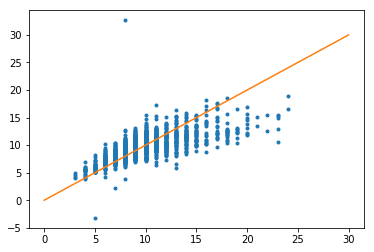

In [26]:
# Graph predicted vs actual values
import numpy as np

plt.plot(y_test, y_predict, '.')

# plot a line, a perfect prediction would all fall on this line y = x
x = np.linspace(0, 30, 100)
y = x
plt.plot(x, y)


plt.show()

In [27]:
def calculate_error_percentage(y_predict, y_test):
    # If this doesn't make sense just take the code out of the function definition above

    if len(y_predict) != len(y_test):
        # have to be the same length so we can match them up
        print("ERROR: predicted and test values are not the same length!")
        return

    error_values = []

    for index, predicted_val in enumerate(y_predict):
        actual_val = y_test[index] # y_test is the actual value
        error = abs(predicted_val - actual_val) / actual_val # calculate error as described in directions

        error_values.append(error) # add the error to our list

    return error_values

In [28]:
error_list = calculate_error_percentage(y_predict, y_test)
error_df = pd.DataFrame(error_list)

In [29]:
error_df.describe()

,0
count,1253.000000
mean,0.161516
std,0.153120
min,0.000296
25%,0.062943
50%,0.130376
75%,0.225705
max,3.083417


In [39]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.4831688142479189

In [43]:
# http://benalexkeen.com/linear-regression-in-python-using-scikit-learn/
model.score(X_test, y_test)

0.27465294418817243